In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

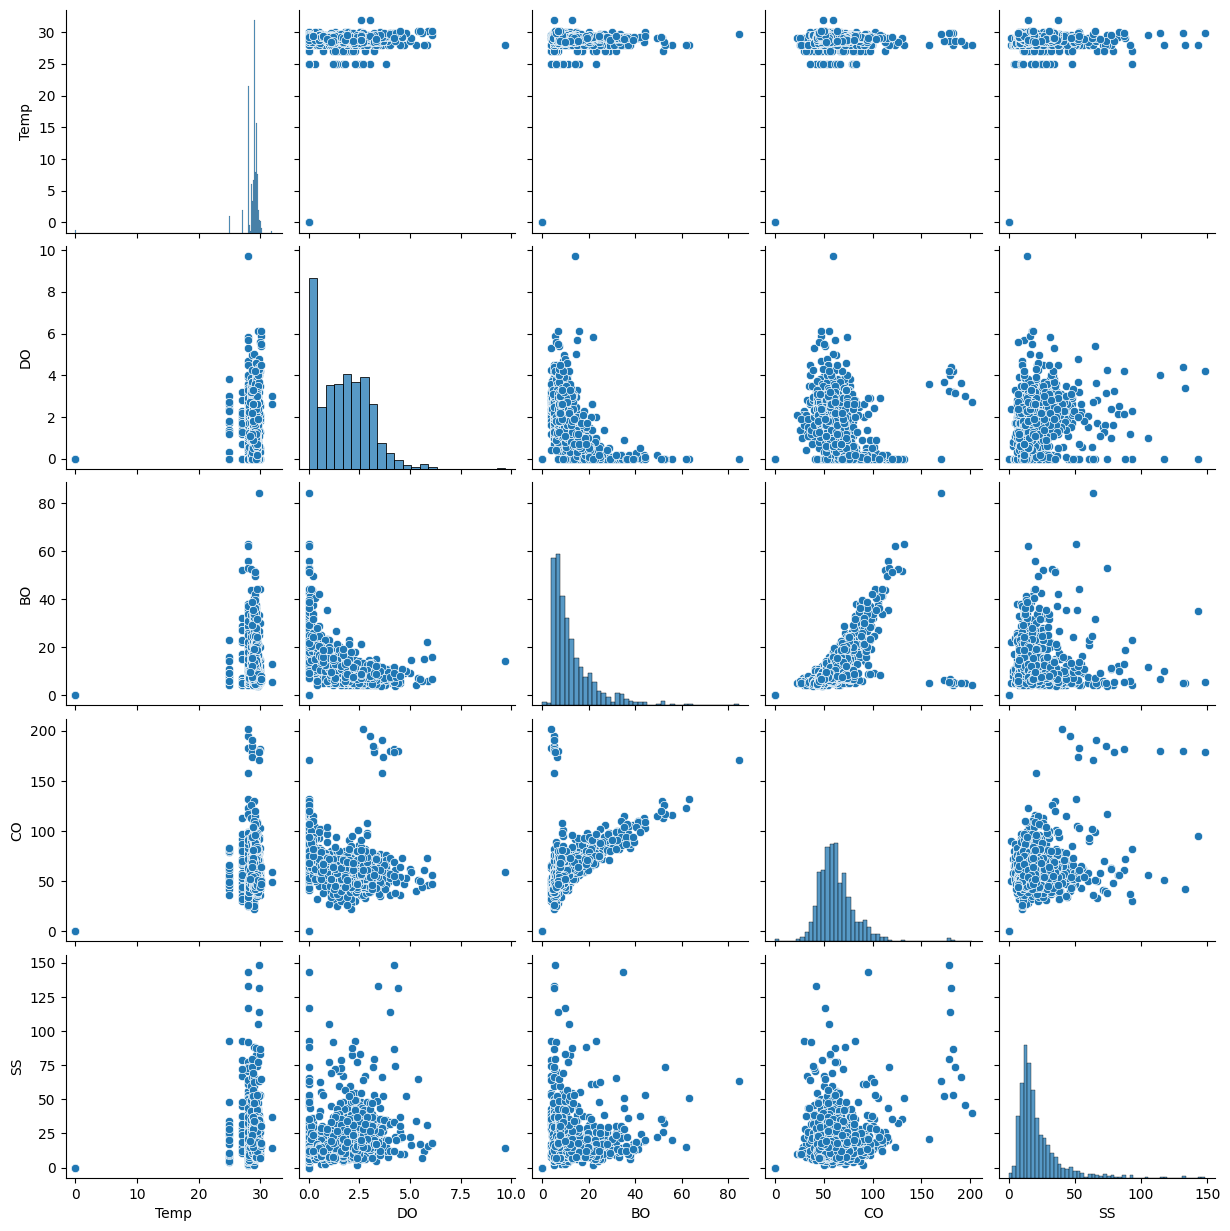

In [6]:
feats = data[['Temp', 'DO', 'BO', 'CO', 'SS']]

sns.pairplot(feats, diag_kind='hist')

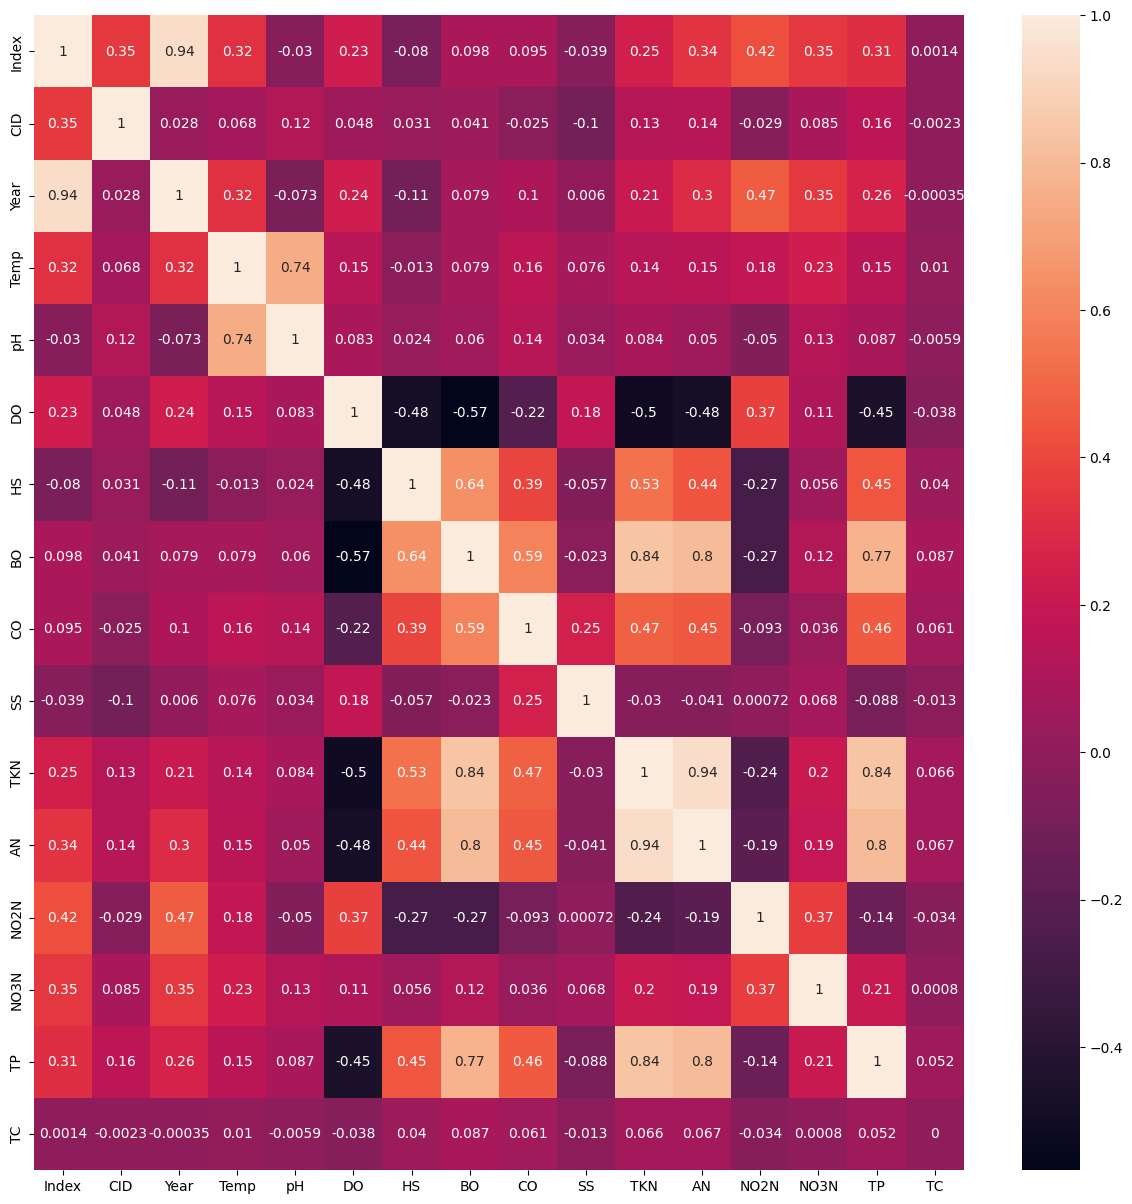

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(numeric_only=True), annot=True)
plt.show()

**Data Preprocessing**

In [8]:
data.describe()

,Index,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,459.000000,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118
std,264.859397,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119
min,1.000000,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,230.000000,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08
50%,459.000000,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10
75%,688.000000,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12
max,917.000000,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121


Check for column types.

In [9]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Drop unnecessary columns from the dataset.

In [10]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [11]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Check for null values in the dataset.

In [12]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [13]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm


In [14]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [15]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

In [16]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [17]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [18]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [19]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN      int64
CNEN       int64
dtype: object

In [20]:
data.head(3)

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61


**Feature Engineering**

Here lets engineer a new feature called ISQA (Simple Water Quality Index) using the formula 
- ISQA = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

columns_to_normalize = ["Temp", "BO", "SS", "DO"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Calculate ISQA
def calculate_isqa(row):
    isqa = row["Temp"] * (row["BO"] + row["SS"] + row["DO"])
    return isqa


data["ISQA"] = data.apply(calculate_isqa, axis=1)
# Rescale ISQA to be between 0 and 100
scaler_isqa = MinMaxScaler(feature_range=(0, 100))

# Reshape ISQA column to 2D for scaling
data["ISQA"] = scaler_isqa.fit_transform(data["ISQA"].values.reshape(-1, 1))

# Show the first few rows of the ISQA column
print(data["ISQA"].head())


0    28.741957
1    26.630712
2    22.208356
3    26.410830
4    14.713759
Name: ISQA, dtype: float64


In [22]:
data['ISQA'].describe()

count    917.000000
mean      30.477172
std       11.652265
min        0.000000
25%       22.731532
50%       29.134353
75%       36.462515
max      100.000000
Name: ISQA, dtype: float64

In [23]:
# From water quality index (WQI) calculate potability and classify as 2 (safe), 1 (potentially unsafe), 0(unsafe)
def calc_water_potability(m):
    if m > 75: 
        return 2
    
    if m > 50:
        return 1
    
    return 0

data['target'] = data['ISQA'].apply(calc_water_potability)
data['target'].nunique()

3

In [24]:
data['target'].value_counts()

target
0    868
1     42
2      7
Name: count, dtype: int64

In [25]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'ISQA', 'target'],
      dtype='object')

**Feature Selection**

In [26]:
X = data[ ['CID', 'Year', 'pH', 'HS', 'CO', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'] ]

y = data['target']

**Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [28]:
X_train.head(2)

,CID,Year,pH,HS,CO,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
65,180.0,2561,7.20,0.30,72.00,11.80,3.10,0.00,2.10,0.90,1.100000e+09,270,73
319,63.0,2562,6.99,0.02,51.75,4.01,1.99,0.26,2.15,0.52,3.590000e+10,290,152


In [29]:
y_train.head(2)

65     1
319    0
Name: target, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Scale the features using standard scalar for faster convergence.

In [31]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# X_train = ss.fit_transform(X_train_resampled)
# X_test = ss.fit_transform(X_test)

In [32]:
X_train[0:2]

,CID,Year,pH,HS,CO,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
65,180.0,2561,7.20,0.30,72.00,11.80,3.10,0.00,2.10,0.90,1.100000e+09,270,73
319,63.0,2562,6.99,0.02,51.75,4.01,1.99,0.26,2.15,0.52,3.590000e+10,290,152


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=75)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test))


/home/puskr/ml_project/ml-project-water-potability/.venv/lib/python3.10/site-packages/pandas/core/generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').